In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
item_c= pd.read_csv('./data/item_categories.csv') # 아이템 카테고리 / ID c : item_category_name, item_category_id
item= pd.read_csv('./data/items.csv') # 카테고리, 아이디, 이름 c: item_name, item_id, item_category_id
train_sale= pd.read_csv('./data/sales_train.csv')  # train data c : data, date_block_num, shop_id,item_id,item_price,item_cnt_day
# item_cnt_day를 예측
sample_sub = pd.read_csv('./data/sample_submission.csv') # 세일하는 기간 ID : 모두 0.5달 세일 c : ID, item_cnt_month
shop= pd.read_csv('./data/shops.csv') # 상점 이름, ID c : show_name,show_id
test= pd.read_csv('./data/test.csv') # 각 상점마다 세일을 어떻게 하는지, 어떤 품목을 세일하는지 c : ID, shop_id,item_id

In [7]:
train_sale

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [26]:
train_sale[train_sale.duplicated(keep = 'first')]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [27]:
train_sale[train_sale.duplicated(keep = 'last')] 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
2198564,31.12.2014,23,42,21619,499.0,1.0


In [34]:
train_sale.loc[[76961,76962,1435365,1435367,1496765,1496766,1671872,1671873,1866322,1866340,2198564,2198566],:]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [39]:
train_sale[train_sale.item_price > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [40]:
train_sale[train_sale.item_cnt_day > 350]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1501160,15.03.2014,14,24,20949,5.000000,405.0
1573252,23.04.2014,15,27,8057,1200.000000,401.0
1573253,22.04.2014,15,27,8057,1200.000000,502.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067667,04.10.2014,21,55,19437,899.000000,401.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2067677,09.10.2014,21,55,19445,1249.000000,412.0
2257299,19.12.2014,23,12,20949,4.000000,500.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0


<AxesSubplot:xlabel='date', ylabel='item_price'>

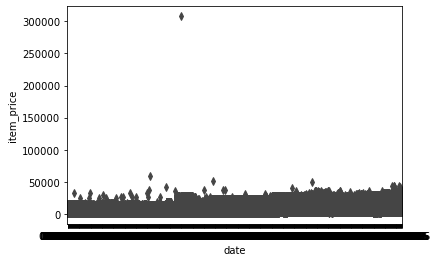

In [35]:
sns.boxplot(x='date',y='item_price',data = train_sale)

<AxesSubplot:xlabel='date', ylabel='item_cnt_day'>

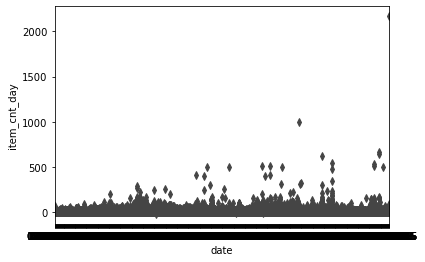

In [38]:
sns.boxplot(x = 'date',y = 'item_cnt_day', data = train_sale,)